## Formatting strings

One of the useful features of earthkit-plots is the ability to **automatically generate** and customise titles and legends using **metadata-based format strings**.

This notebook shows how you can take full control of plot labels using template strings that pull values from your data.

Let's start by getting some sample data:

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "era5-2t-msl-1985122512.grib")
data.ls()

era5-2t-msl-1985122512.grib:   0%|          | 0.00/3.96M [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19851225,1200,0,an,0,regular_ll
1,ecmf,msl,surface,0,19851225,1200,0,an,0,regular_ll


This contains:
- 2t — 2-metre temperature
- msl — mean sea level pressure

Let's start by plotting both fields using quickplot. By default, earthkit-plots will:
- Detect field names and times from metadata
- Auto-generate the title and legend

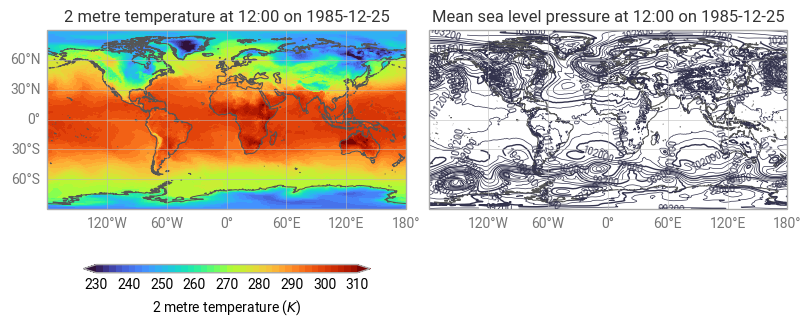

In [2]:
ek.plots.quickplot(data).show()

Now let’s plot both fields overlaid on the same map. The plot will recognise that both fields share the same time, so it avoids repeating the time in each label - notice how the time is shown only once, while the variable names are still distinguished:

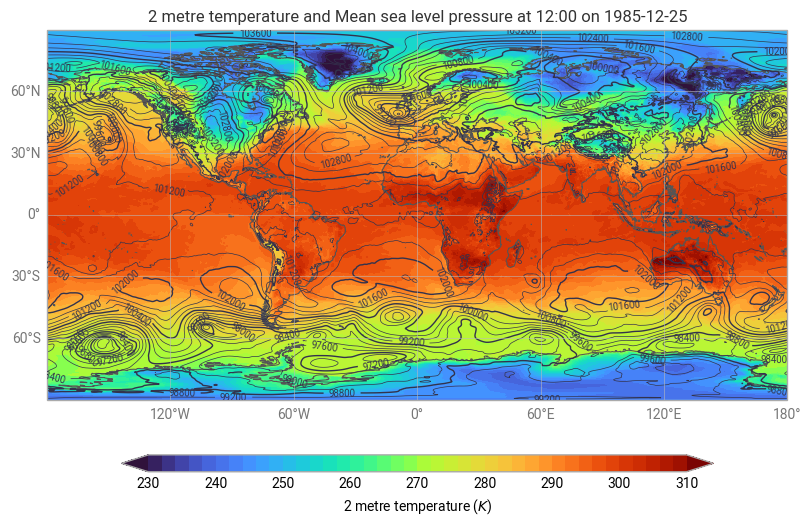

In [3]:
ek.plots.quickplot(data, mode="overlay").show()

You can fully customise the plot's title and legend using template strings based on metadata.

Let’s create a chart manually and customise the title and legend:

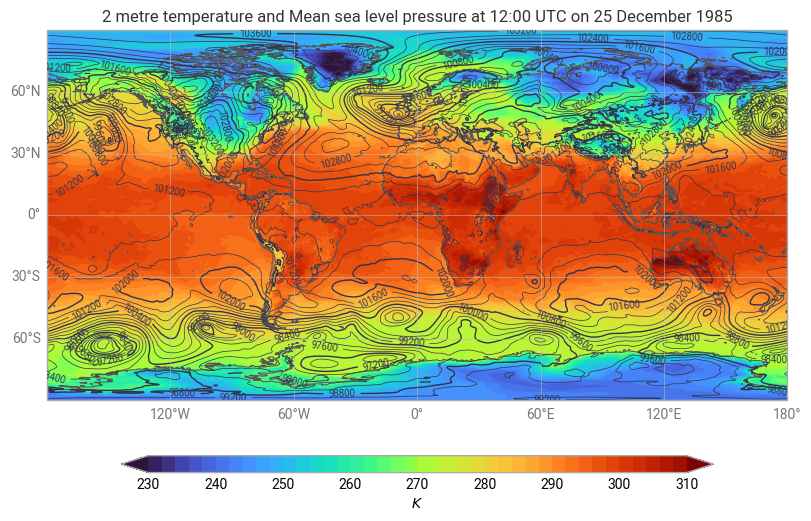

In [4]:
chart = ek.plots.Map()

chart.quickplot(data.sel(short_name="2t"))
chart.quickplot(data.sel(short_name="msl"))

chart.title("{variable_name} at {time:%H:%M UTC on %-d %B %Y}")

chart.legend(label="{units}")

chart.coastlines()
chart.gridlines()

chart.show()

There are some special keys to be aware of here:

- `{variable_name}` scans your data for well-known metadata keys which describe the name of the variable. It iterates over these in priorirty order, until it finds something that matches (e.g. `long_name`, `standard_name`, `name`, `short_name` etc.).
- `{ensemble_member}` scans your data for well-known metadata keys which describe the ensemble member number (e.g. `ensemble_member`, `realization`, `number` etc.)
- `{units}` will look for well-known units metadata, unless the user has specified specific units for this plot, in which case those units will be used instead. You can also format units to use different conventions - see [Formatting units](string-formatting-units.html) for more information.
- `{time}`, `{base_time}`, `{valid_time}` and `{lead_time}` are all special keys for formatting time information. For non-forecast data, you're likely to only need the `{time}` key - see [Formatting time](string-formatting-time.html) for more information.

You can also template using **any metadata key** that exists on your data, e.g. as a GRIB key, a NetCDF attribute, or an xarray attribute.

Note that in addition to metadata, plot-specific information like the **domain** and user-specified **units** can also be templated into plots, making it even easier to write generic code that will automatically update to reflect the contents of the plot.

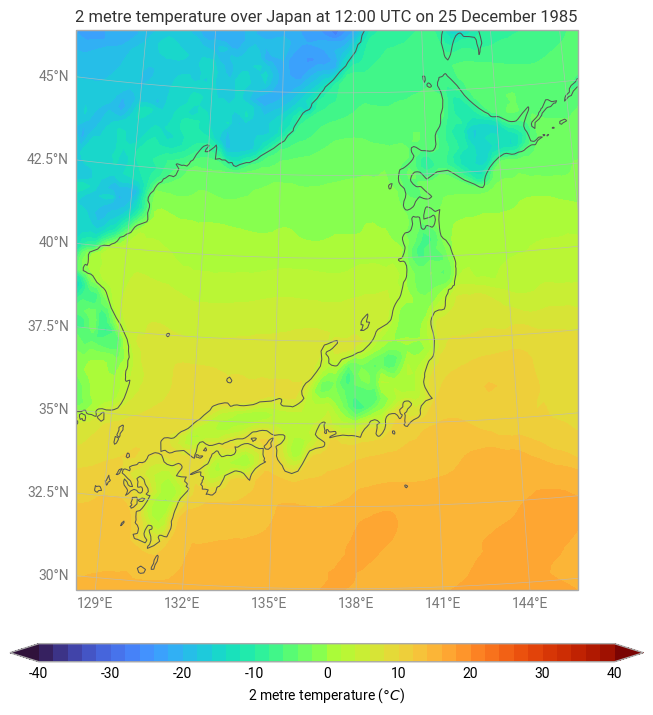

In [5]:
chart = ek.plots.Map(domain="Japan")

chart.quickplot(data.sel(short_name="2t"), units="celsius")

chart.title("{variable_name} over {domain} at {time:%H:%M UTC on %-d %B %Y}")

chart.legend(label="{variable_name} ({units})")

chart.coastlines()
chart.gridlines()

chart.show()